In [78]:
# https://pandas.pydata.org/pandas-docs/stable/index.html
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [79]:
df = pd.read_csv("mtcars.csv")

# 기본 정보 출력

### Head

In [80]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Tail

In [81]:
df.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


### Number of Rows

In [82]:
df.shape[0]

32

Column Names

In [83]:
df.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

### Modify Column Names

In [84]:
df = df.rename(columns={'Unnamed: 0':"model"})
df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

### Information of DataFrame

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


### Data Types

In [86]:
df.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

### Descriptive Statistics

In [87]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


# 1. Value Count

In [88]:
df['gear'].value_counts()

gear
3    15
4    12
5     5
Name: count, dtype: int64

In [89]:
df['am'].value_counts() # transmission

am
0    19
1    13
Name: count, dtype: int64

In [90]:
# using string
gear_am = df.apply(lambda row: f"({row['gear']}, {row['am']})", axis=1)
gear_am.value_counts()

(3, 0)    15
(4, 1)     8
(5, 1)     5
(4, 0)     4
Name: count, dtype: int64

In [91]:
# using crosstab
pd.crosstab(df['gear'], df['am'])

am,0,1
gear,,
3,15,0
4,4,8
5,0,5


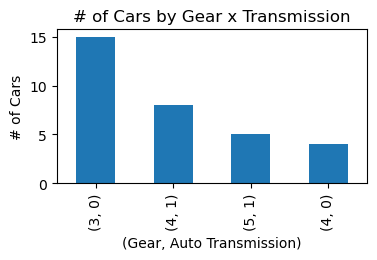

In [92]:
plt.figure(figsize=(4,2))
gear_am.value_counts().plot(kind='bar')
plt.title("# of Cars by Gear x Transmission")
plt.xlabel("(Gear, Auto Transmission)")
plt.ylabel("# of Cars")
plt.show()

## Historam of all features

In [93]:
num_features = df.shape[1] - 1
num_cols = 3
num_rows = (num_features - 1) // num_cols + 1
num_cols, num_rows

(3, 4)

/var/folders/bc/x3nsccl97glcpc640yc5j2zr0000gn/T/ipykernel_37308/1776861272.py:18: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, figsize=(10, 10))


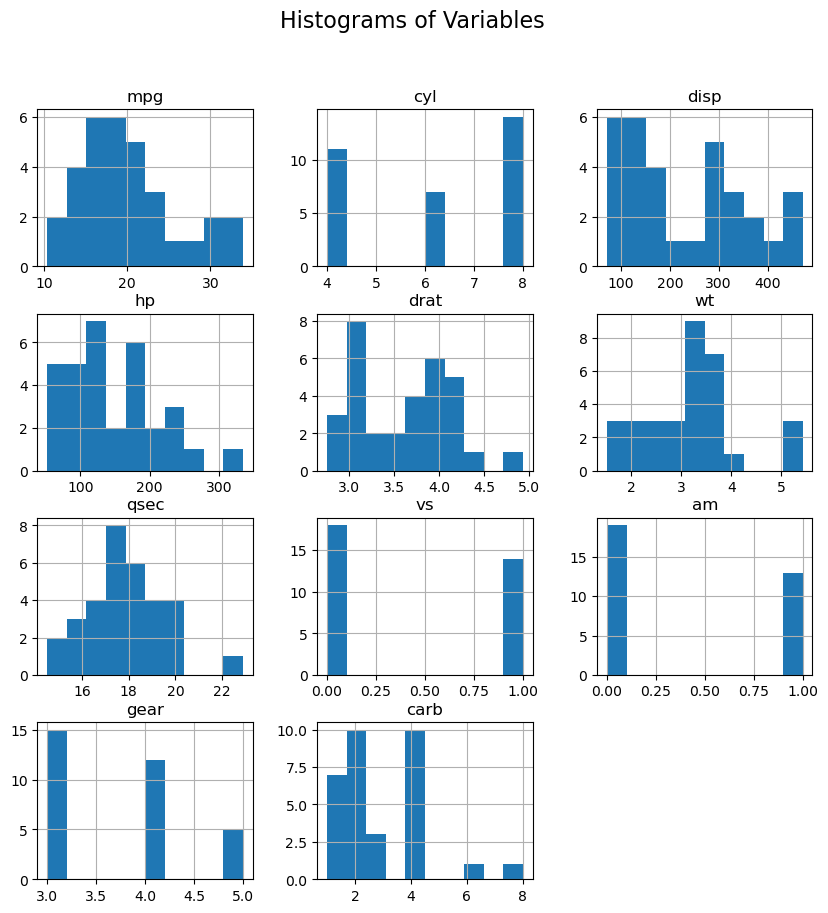

In [94]:
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
# fig.suptitle("Histograms of Variables", size=50)

# for i, col in enumerate(df.columns[1:]):
#     r,c = divmod(i, num_cols)
#     ax = axes[r, c]
#     df[col].plot(kind='hist', ax=ax, title=col)
#     ax.grid(True)

# # Remove any empty subplots
# for j in range(i+1, num_rows * num_cols):
#     fig.delaxes(axes.flatten()[j])



fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, frameon=False)
df.hist(ax=ax, figsize=(10, 10))
fig.suptitle("Histograms of Variables", fontsize=16)
plt.show()

## Correlations

Text(0, 0.5, 'horsepower')

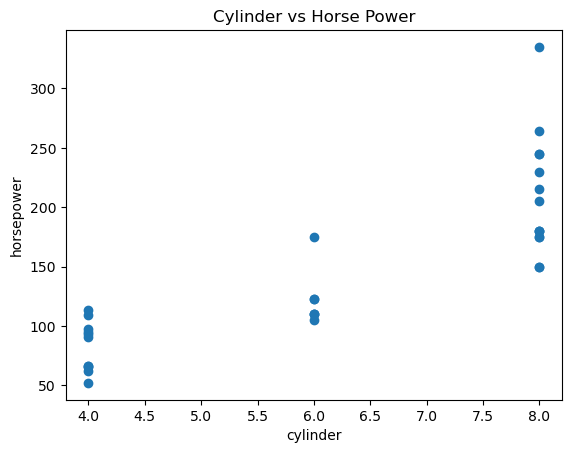

In [95]:
plt.scatter(df['cyl'], df['hp'])
plt.title("Cylinder vs Horse Power")
plt.xlabel('cylinder')
plt.ylabel('horsepower')

Text(0, 0.5, 'horsepower')

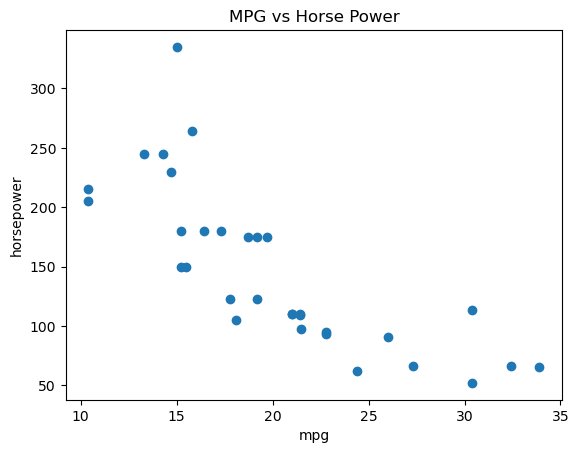

In [96]:
plt.scatter(df['mpg'], df['hp'])
plt.title("MPG vs Horse Power")
plt.xlabel('mpg')
plt.ylabel('horsepower')

In [97]:
df.select_dtypes(exclude=['object']).corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


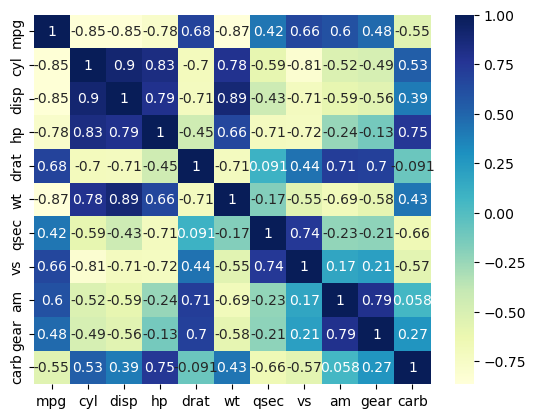

In [98]:
import seaborn as sns

plot = sns.heatmap(df.select_dtypes(exclude=['object']).corr(), cmap="YlGnBu", annot=True)
plt.show()
# plt.matshow(df.select_dtypes(exclude=['object']).corr(), cmap='seismic')

# 팀 활동
- 이런 데이터셋을 분석해서 얻을 수 있는 경제적 가치는 무엇일까요? 어떤 비즈니스 상황에서 이런 데이터셋을 분석해서 어떤 경제적 가치를 얻을 수 있을까요?
- 변수들 간의 상관 관계가 높은 조합을 임의로 2개 선택해서 해당 데이터 간의 상관 관계를 그래프로 그리고 어떤 결론을 내릴 수 있는지를 토의하세요.

### Feature details
Feature|Description
-------|-----------
mpg|마일/US갤런
cyl|실린더의 수
disp|배기량 (세제곱 인치)
hp|마력
drat|기어비 (3.31 이상이면 가속력이 좋은 것으로 알려짐)
wt|무게 (1000 lbs)
qsec|1/4마일 시간
vs|엔진 (0=V-shaped, 1=straight)
am|변속 (0=자동, 1=수동)
gear|전진 기어의 수
carb|카뷰레터(기화기)의 수

## 예시 비즈니스 상황

1. 자동차를 설계할 때 다양한 요소의 기준점을 잡기 위해 타사의 데이터와 비교해보고자 한다.
2. 제작한 자동차가 타사의 자동차와 비교했을 때 feature들의 분포가 타사의 분포를 따르는지 아닌지 판단하고자 한다.
3. 차종 별 수요에 대한 분포를 알고 있을 때 어떤 요소를 가지는 차종들이 어떠한 수요를 보이는지 알고자 한다.

## 얻을 수 있는 경제적 가치

1. 합리적인 수치로 특성들의 목표치를 정하여 타사에 대한 비교우위를 가지는 목표 설정에 드는 시간과 경제적 비용을 절약할 수 있다.
2. 특정 무게, 실린더의 수, 변속 타입 등에 따른 배기량을 예측해서 제작 완료 후 환경 정책에 따른 불이익을 피하기 위한 설계를 할 수 있다.
3. A에 따른 B의 예측값, B에 따른 A의 예측 값, (A,B)에 따른 (C,D)의 값 등 차량 설계 시 복합적인 예측이 가능하다.

## mgp vs cyl
mpg와 cyl의 상관계수 -0.85로 확실한 음의 상관관계를 띄고 있음\
실린더의 개수가 적다 <-> 연비가 높다\
실린더의 개수가 많다 <-> 연비가 낮다

실린더의 개수가 적을 때 연비의 범위가 넓은 것처럼 보이지만,\
연비 축을 로그 스케일로 보면 실린더의 개수가 많을 때의 연비의 범위와 크게 다르지 않음을 확인할 수 있음

실린더의 개수가 6개일 때는 연비적인 측면에서 어중간함을 보임\
이 차들은 마력이나 기타 요소에서 장점을 챙기지 못하지 않았을까

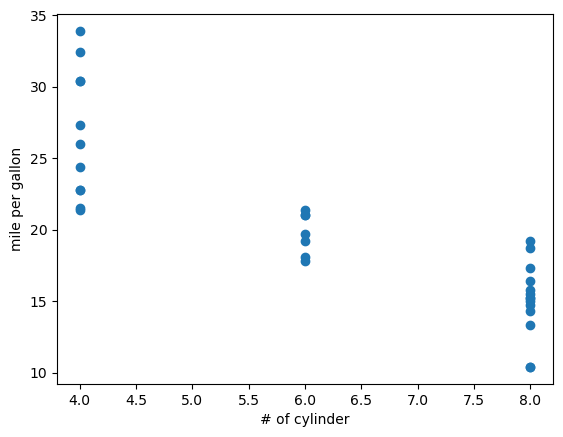

In [99]:
plt.scatter(df['cyl'], df['mpg'])
plt.xlabel('# of cylinder')
plt.ylabel('mile per gallon')
# plt.yscale('log')
plt.show()

## wt vs disp
wt와 disp의 상관계수 0.89로 확실한 양의 상관관계를 띄고 있음\
무겁다 <-> 배기량이 많다\
가볍다 <-> 배기량이 적다

무게가 작을 때 (wt<2.5) 배기량이 완만히 증가하지만\
무게가 2.5 이상이 되면 배기량이 급격히 증가함\
혹은 무게가 3~3.5 사이에서는 배기량의 범위가 넓다고 생각할 수도 있음\
그런데 무게가 5가 넘어가는 세 차종은 어떻게 배기량을 줄였는가?\
배기량을 줄이면 어떤 이점이 있는가?\
그 세 차종의 배기량을 줄인 방법을 알 수 있다면 그 이점을 잘 활용할 수 있을 것.

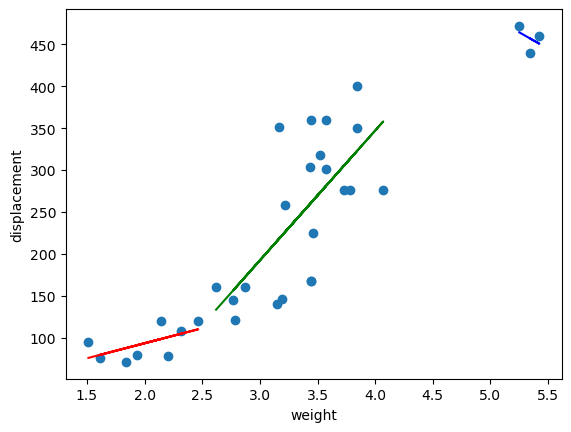

In [100]:
df1 = df[df['wt'] < 2.5]
df2 = df[(df['wt'] >= 2.5) & (df['wt'] < 5)]
df3 = df[df['wt'] >= 5]

plt.scatter(df['wt'], df['disp'])
plt.xlabel('weight')
plt.ylabel('displacement')

def plot_trendline(df, color):
    z = np.polyfit(df['wt'], df['disp'], 1)
    p = np.poly1d(z)
    plt.plot(df['wt'], p(df['wt']), color)

plot_trendline(df1, 'r')
plot_trendline(df2, 'g')
plot_trendline(df3, 'b')

plt.show()

<Axes: xlabel='wt', ylabel='disp'>

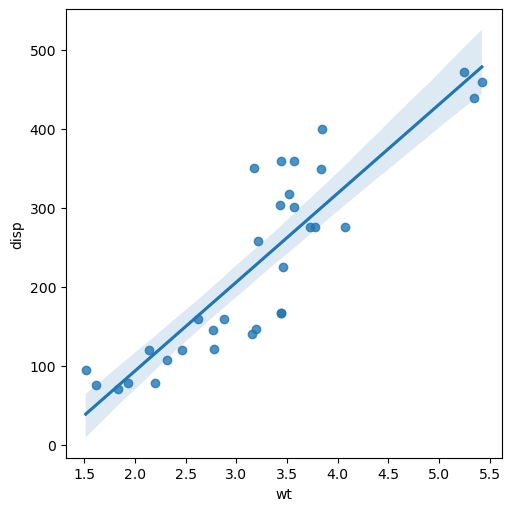

In [101]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
sns.regplot(x="wt", y="disp", data=df, ax=ax)